# Multi-qubit Operations and Circuits using Qiskit

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries 
from qiskit import QuantumCircuit, execute
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import *
from qiskit.quantum_info import *

## Product states
We know that we can construct two-qubit states by taking the tensor product of two single-qubit states. Let's try to do that. We will try this with statevectors and try to reproduce the basis vectors mentioned in lecture. The `Statevector` class are available in the the `qiskit.quantum_info` submodule, which we have imported above. We can perform the tensor product using the `tensor()` method of `Statevector` objects and `Operator` objects. The documentation is available [here](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.tensor.html#qiskit.quantum_info.Statevector.tensor). If we have two statevectors: `q1_sv` for $|q_1\rangle$ and `q2_sv` for $|q_2\rangle$.

`q1_sv.tensor(q2_sv)` corresponds to the operation $|q_1\rangle \otimes |q_2\rangle$

In [2]:
q1_sv = Statevector.from_label('0')
q2_sv = Statevector.from_label('1')
prod_sv = q1_sv.tensor(q2_sv)
print(prod_sv.data)

[0.+0.j 1.+0.j 0.+0.j 0.+0.j]


We get exactly the statevector that we saw in the lecture. Alternatively, we can also directly create a multi-qubit state using the `from_label()` method.

In [3]:
prod_sv2 = Statevector.from_label('01')
print(prod_sv2.data)

[0.+0.j 1.+0.j 0.+0.j 0.+0.j]


## Multi-qubit operations using tensor products
If we have two operators: `op1` for $0_1$ and `op2` for $O_2$.

`op1.tensor(op2)` corresponds to the operation $O_1 \otimes 0_2$

In [4]:
op1 = Operator.from_label('X')
op2 = Operator.from_label('I')
prod_op = op1.tensor(op2)
print(prod_op.data)

[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


 Alternatively, we can also directly create a multi-qubit operator using the `from_label()` method.

In [5]:
prod_op2 = Operator.from_label('XI')
print(prod_op2.data)

[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


## The tensor product: before and after
We have checked that the multi-qubit product states and operators generated directly by qiskit are the same as the tensor product of the constituent single-qubit states and operator.
. Let us check how unitary operations behave under the tensor product. We want to check whether $$ (O_{1} \otimes O_{2})(|\psi\rangle_{1} \otimes |\psi\rangle_{2}) = O_{1}|\psi\rangle_{1} \otimes O_{2}|\psi\rangle_{2}$$ 
In the section above, we've used $|\psi\rangle_{1} = |0\rangle$, $|\psi\rangle_{2} = |1\rangle$, $O_{1} = X$ and $ O_{2} = I$. The resulting two-qubit state is $|\psi\rangle_{1} \otimes |\psi\rangle_{2} = |\psi_1, \psi_2\rangle = |0,1\rangle \equiv |01\rangle$ (We usually omit the comma in binary notation, more on this later). The two-qubit operator is $O_{1} \otimes O_{2} = X\otimes I$. 

To verify this, we will `evolve()` the single-qubit states using the single-qubit operators first, then take their tensor product and check if this is equal to the result of using `evolve()` on the two-qubit state using the two-qubit operator.


In [6]:
q1_sv_1 = q1_sv.evolve(op1)
q2_sv_1 = q2_sv.evolve(op2)
prod_sv_1 = q1_sv_1.tensor(q2_sv_1)

In [7]:
prod_sv2_1 = prod_sv2.evolve(prod_op2)

prod_sv_1.equiv(prod_sv2_1)

True

## Quantum circuits for multiple qubits
Quantum circuits behave similarly for multiple qubits as they do for a single qubit. We create a ciruit with a certain number of qubits (given as argument to the `QuantumCircuit()` constructer) and then add operations/gates to the appropriate qubits. 

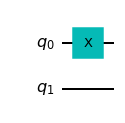

In [8]:
qc = QuantumCircuit(2)
# All qubits start in the |0> state
qc.x(0)
qc.draw(output='mpl')
# qc.measure(0,0) # First argument is the qubit to be measured

We can create an `Operator` from this circuit to check the matrix corresponding to the operation. 

In [9]:
print(Operator(qc).data)

[[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


In [10]:
Operator(qc).equiv(prod_op2)

False

###  Endianness in qiskit
Now that we have started considering multiple quantum registers or qubits, there is the important matter or ordering. The results of measurement for a multi-qubit circuit will be a binary string, and so the ordering of bits is important. This is commonly referred to in computing as [endianness](https://en.wikipedia.org/wiki/Endianness). 

Big endian (BE) means that the most-significant bit (MSB), denoted here by the largest subscript, is written first (at the lowest memory address). An $n$-qubit product state written in the big endian format would read $|q_{n-1}, q_{n-2}, \cdots, q_{2}, q_{1}, q_{0}\rangle$ . **This is the convention qiskit uses by default**.

Little endian (LE) means that the least-significant bit (LSB) is written first. This is a convention found in most physics literature. The same $n$-qubit product state written in the big endian format would read $|q_{0}, q_{1}, q_{2} \cdots q_{n-2}, q_{n-1}\rangle$. We have used this notation in the preceding section, which is why the operator was different in both cases.

There is a very simple way to switch between the two representations in qiskit. Every `QuantumCircuit()` has a `reverse_bits()` method that returns a new `QuantumCircuit()` with the order of bits (or qubits) reversed. **Note that this does not change anything in the original circuit**. Since qiskit is BE by default, using this will change it to LE and we should get the same operator as in the previous section. 


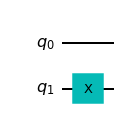

In [11]:
qc_rev = qc.reverse_bits()
qc_rev.draw(output='mpl')

In [12]:
print(Operator(qc_rev).data)

[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


In [13]:
Operator(qc_rev).equiv(prod_op2)

True

## Experiments with multi-qubit circuits
We can change between the little endian and big endian representations using the `reverse_bits()` method. The number next to the measurement symbol on the circuit diagram denotes the position of the measurement result in the output starting from the right. 

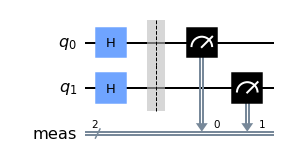

In [14]:
qc2 = QuantumCircuit(2)
qc2.h([0,1])
qc2.measure_all()
qc2.draw(output='mpl')

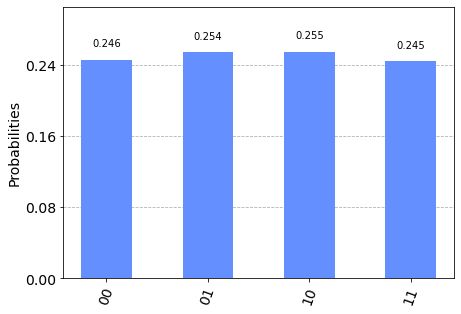

In [15]:
job = execute(qc2, backend=QasmSimulator(), shots=8192)
result = job.result()
plot_histogram(result.get_counts())

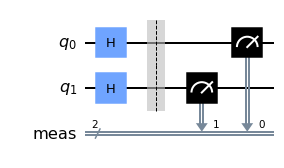

In [16]:
qc2_rev = qc2.reverse_bits()
qc2_rev.draw(output='mpl')

In [17]:
job = execute(qc2_rev, backend=QasmSimulator(), shots=8192)
result = job.result()
result.get_counts()

{'00': 1970, '01': 2126, '10': 2062, '11': 2034}

We will specify the endianness of the problem for any programming assignments henceforth.

## Multi-qubit Operators from circuits

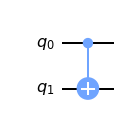

In [18]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw(output='mpl')

In [19]:
cnot_op = Operator(qc)
sv = Statevector.from_label('0+') # Little Endian
sv2 = sv.evolve(cnot_op)

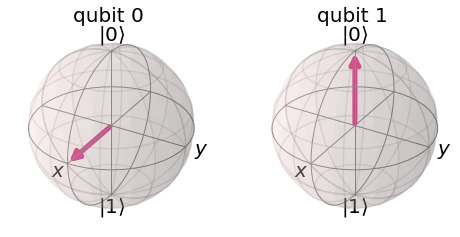

In [20]:
plot_bloch_multivector(sv)

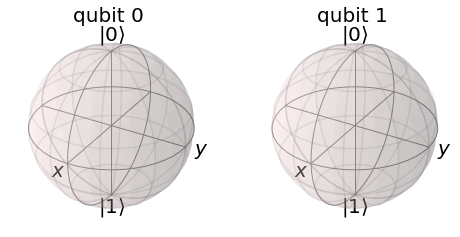

In [21]:
plot_bloch_multivector(sv2)

In [22]:
sv2.data

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

## Preparing Bell States
Starting from the $|00\rangle$ state, we can create the Bell state $|\beta_{00}\rangle$ (also called $|B_{00}\rangle$ or $|\Phi^+\rangle$)using the following circuit. This particular state is defined as 
$$|\beta_{00}\rangle = \frac{|00\rangle+|11\rangle}{\sqrt{2}}$$

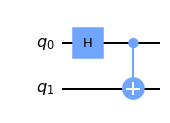

In [23]:
bell_state_prep = QuantumCircuit(2)
bell_state_prep.h(0)
bell_state_prep.cx(0,1)
bell_state_prep.draw(output='mpl')

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


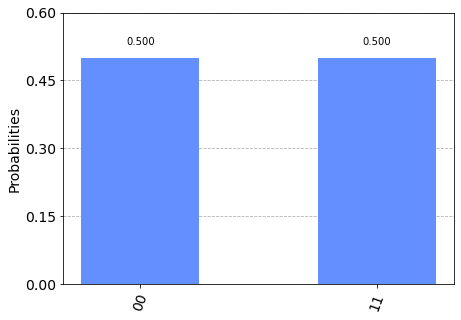

In [24]:
b00_sv = Statevector.from_instruction(bell_state_prep)
print(b00_sv.data)
# plot_bloch_multivector(b00_sv)
plot_histogram(b00_sv.probabilities_dict())

### More Bell states and composing quantum circuits
Often in quantum algorithms, the circuit for an algorithm is composed from smaller repeated blocks with a particular function. To illustrate this, we will prepare all the four Bell states. Creating a Bell state uses the same gates as the $|\beta_{00}\rangle$ state, but with some gates prepended before this _block_.

In [25]:
def create_bell_circ(state):
    bell_circ = QuantumCircuit(2)
    for i in range(2):
        if (state[i] == '1'):
            bell_circ.x(i)
    bell_circ.barrier()
    bell_circ.compose(bell_state_prep, [0,1], inplace=True)
    return bell_circ

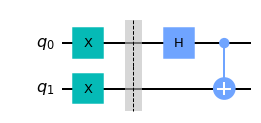

In [26]:
bij_circ = create_bell_circ('11')
bij_circ.draw(output='mpl')

[ 0.        +0.j -0.70710678+0.j  0.70710678+0.j  0.        +0.j]


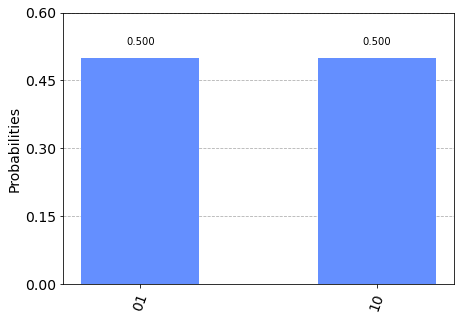

In [27]:
bij_sv = Statevector.from_instruction(bij_circ)
print(bij_sv.data)
# plot_bloch_multivector(bij_sv)
plot_histogram(bij_sv.probabilities_dict())

## Measurement in the Bell basis
As mentioned before, if we know how to prepare the basis states of a particular basis (via some unitary operation), we can measure in that basis using standard basis measurements and the inverse unitary operation. We know how to prepare the Bell states, so we can measure in the Bell basis as well. 

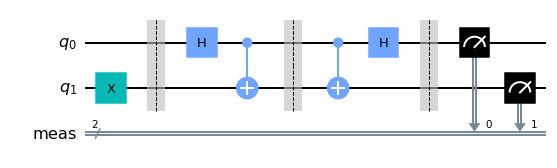

In [28]:
# Create one of the four Bell states
bij_circ = create_bell_circ('01')
bij_circ.barrier()
# Invert the Bell state preparation circuit as a measuring device
bell_meas_circ = bell_state_prep.inverse()
# Join everything together
total_bell_circ = bij_circ.compose(bell_meas_circ, [0,1])
# Add measurement and draw the circuit
total_bell_circ.measure_all()
total_bell_circ.draw(output='mpl')

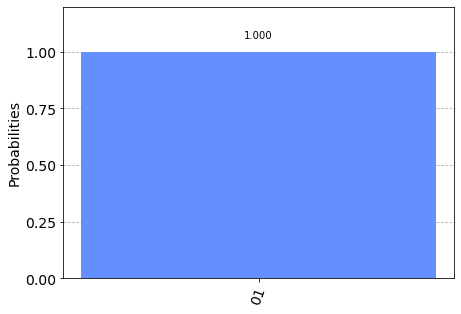

In [29]:
job = execute(total_bell_circ.reverse_bits(), backend = QasmSimulator(), shots = 8192)
result = job.result()
plot_histogram(result.get_counts())